<a href="https://colab.research.google.com/github/Sujal-vajire/Machine-learning-models/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from pytz import timezone
import pytz

In [29]:
dataset = pd.read_csv('dataset1.csv',)

In [30]:
dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [31]:
dataset.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [32]:
hawaii= timezone('Pacific/Honolulu')
dataset.index =  pd.to_datetime(dataset['UNIXTime'], unit='s')
dataset.index = dataset.index.tz_localize(pytz.utc).tz_convert(hawaii)
dataset['MonthOfYear'] = dataset.index.strftime('%m').astype(int)
dataset['DayOfYear'] = dataset.index.strftime('%j').astype(int)
dataset['WeekOfYear'] = dataset.index.strftime('%U').astype(int)
dataset['Hour'] = dataset.index.hour
dataset['Month'] = dataset.index.month
dataset['Date'] = dataset.index.date

dataset['TimeSunRise'] = pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S').dt.time
dataset['TimeSunSet'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S').dt.time
dataset['Total_time'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S').dt.hour

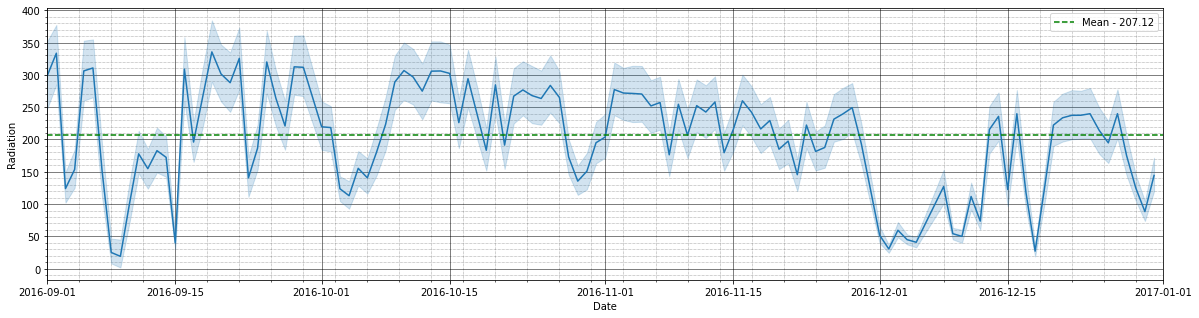

In [33]:
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=dataset, x="Date", y="Radiation")

mean_avg=dataset['Radiation'].mean()
ax.axhline(mean_avg, color='green', linestyle='--', label=f"Mean - {mean_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([datetime(2016,9,1), datetime(2017,1,1)])

ax.legend();

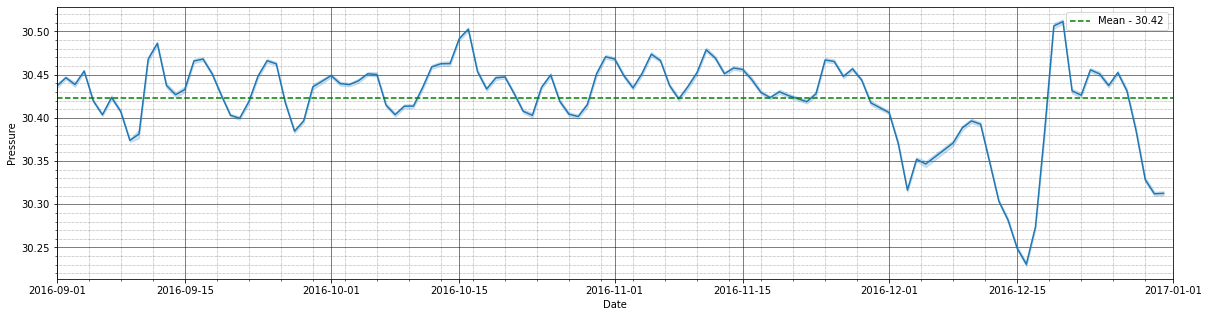

In [34]:
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=dataset, x="Date", y="Pressure")

mean_avg=dataset['Pressure'].mean()
ax.axhline(mean_avg, color='green', linestyle='--', label=f"Mean - {mean_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([datetime(2016,9,1), datetime(2017,1,1)])

ax.legend();

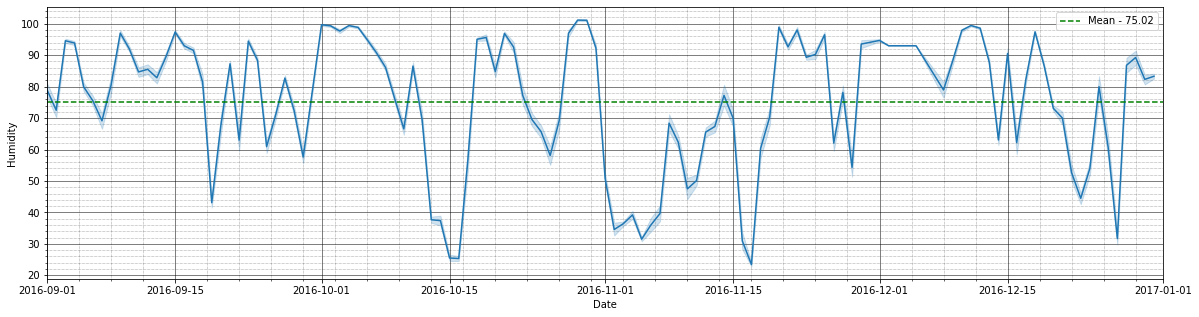

In [35]:
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=dataset, x="Date", y="Humidity")

mean_avg=dataset['Humidity'].mean()
ax.axhline(mean_avg, color='green', linestyle='--', label=f"Mean - {mean_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([datetime(2016,9,1), datetime(2017,1,1)])

ax.legend();

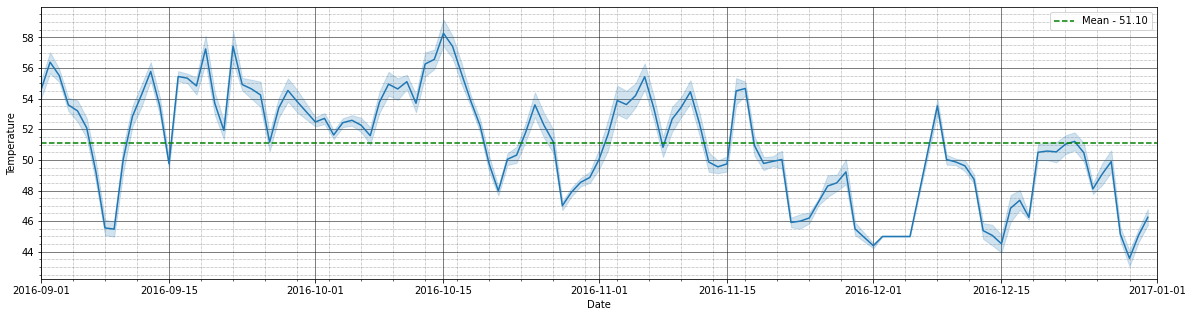

In [36]:
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=dataset, x="Date", y="Temperature")

mean_avg=dataset['Temperature'].mean()
ax.axhline(mean_avg, color='green', linestyle='--', label=f"Mean - {mean_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([datetime(2016,9,1), datetime(2017,1,1)])

ax.legend();

Text(0.5, 1.0, 'Pressure')

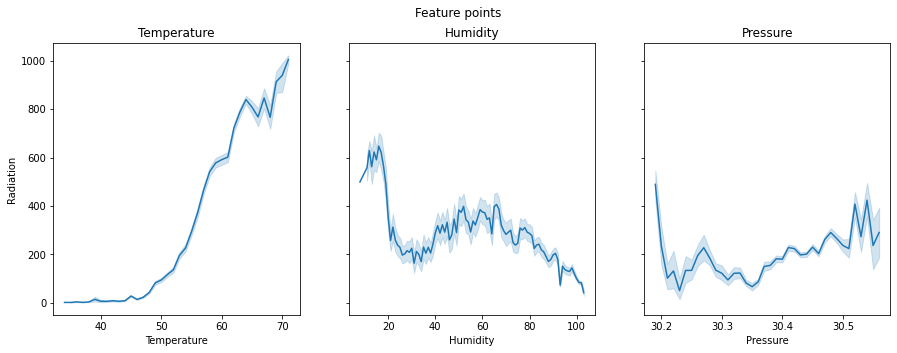

In [38]:
df=dataset
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Feature points')
sns.lineplot(ax=axes[0], x=df['Temperature'].values, y=df['Radiation'].values)
axes[0].set(xlabel='Temperature', ylabel = 'Radiation')
axes[0].set_title(df['Temperature'].name)
sns.lineplot(ax=axes[1], x=df['Humidity'].values, y=df['Radiation'].values)
axes[1].set(xlabel='Humidity', ylabel = 'Radiation')
axes[1].set_title(df['Humidity'].name)
sns.lineplot(ax=axes[2],  x=df['Pressure'].values, y=df['Radiation'].values)
axes[2].set(xlabel='Pressure', ylabel = 'Radiation')
axes[2].set_title(df['Pressure'].name)

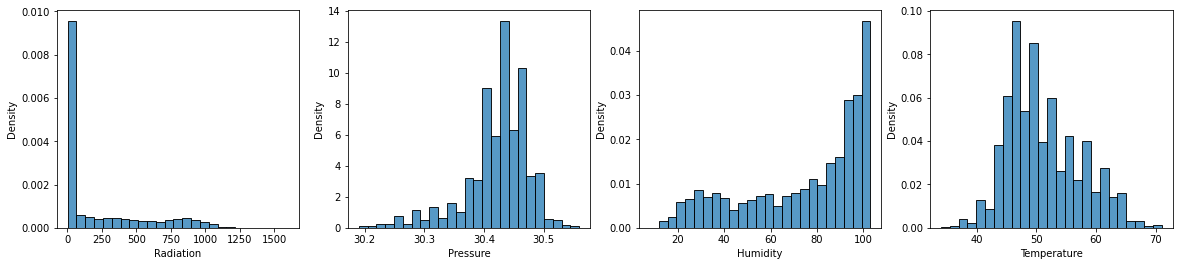

In [39]:
dataset=df
f, ax = plt.subplots(1,4,figsize=(20,4))
sns.histplot(dataset['Radiation'], stat="density", bins=25, ax=ax[0])
sns.histplot(dataset['Pressure'], stat="density", bins=25, ax=ax[1])
sns.histplot(dataset['Humidity'], stat="density", bins=25, ax=ax[2])
sns.histplot(dataset['Temperature'], stat="density", bins=25, ax=ax[3]);

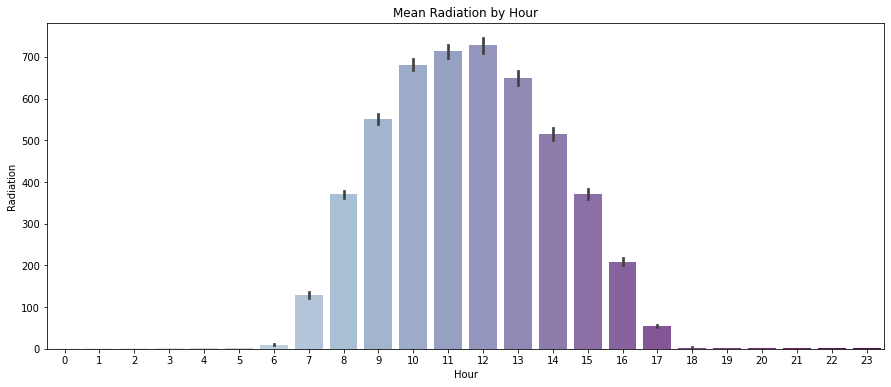

In [40]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="Hour", y='Radiation', data=dataset, palette="BuPu")
ax.set_title('Mean Radiation by Hour');

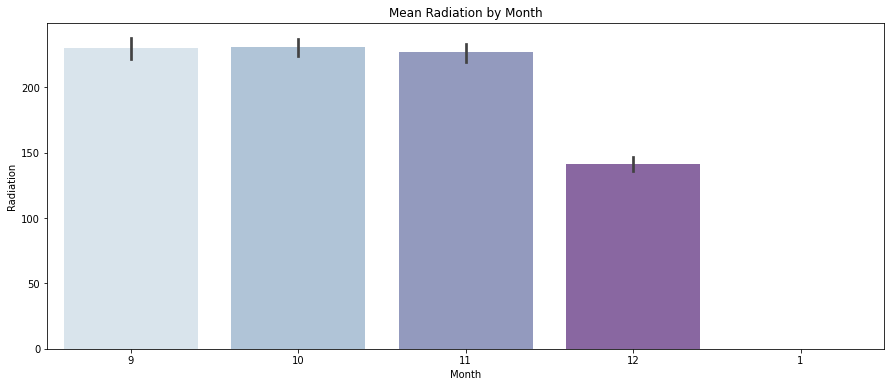

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="Month", y='Radiation', data=dataset, palette="BuPu", order=[9,10,11,12,1])
ax.set_title('Mean Radiation by Month');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


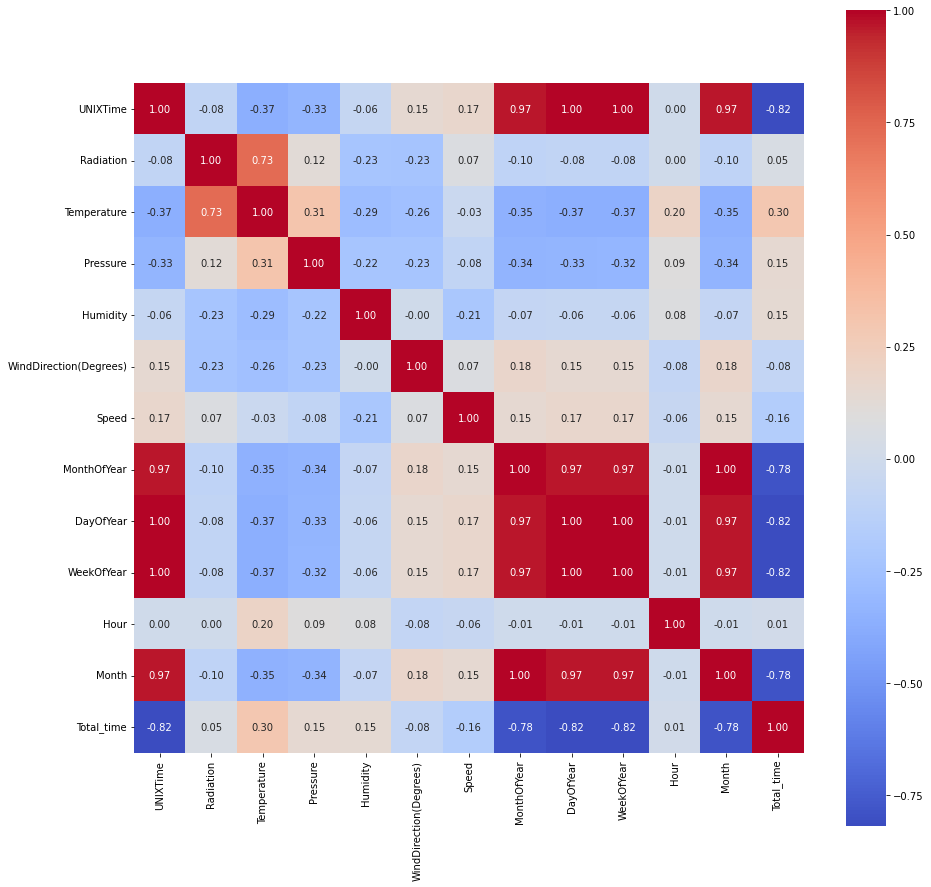

In [43]:
corr = dataset.corr(method = "pearson")
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, ax=ax, annot=True, fmt=".2f");